In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,name,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.000000,0.004968,0.143370,0.000000,0.000000,0.938635,0.480550,18
1,0.000443,0.003539,0.165469,0.220794,0.060606,0.945497,0.772254,40
2,0.000886,0.004556,0.100399,0.000000,0.000000,0.860134,0.557937,18
3,0.001329,0.000827,0.077330,0.129641,0.000000,0.994121,0.667010,10
4,0.001772,0.002318,0.182346,0.103005,0.010101,0.860134,0.344968,5
5,0.002215,0.003716,0.164833,0.119234,0.000000,0.870074,0.387616,3
6,0.002658,0.000137,0.029155,0.000000,0.000000,0.931638,0.814199,29
7,0.003101,0.000813,0.056125,0.112309,0.000000,0.870074,0.165778,2
8,0.003545,0.001649,0.110227,0.064135,0.020202,0.940937,0.498323,20
9,0.003988,0.000326,0.068629,0.000000,0.000000,0.885153,0.293394,3


In [3]:
X = dataset.iloc[:, [*range(0,6),7]].values
Y = dataset['guests'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 7


first_hidden_layer_size = 70
second_hidden_layer_size = 45
third_hidden_layer_size = 20
fourth_hidden_layer_size = 45
fifth_hidden_layer_size = 30
sixth_hidden_layer_size = 45

output_layer_size = 1


epochs_number = 100
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(third_hidden_layer_size, activation='relu'))

model.add(Dense(fourth_hidden_layer_size, activation='relu'))

model.add(Dense(fifth_hidden_layer_size, activation='relu'))

model.add(Dense(sixth_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 70)                560       
_________________________________________________________________
dense_2 (Dense)              (None, 45)                3195      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                920       
_________________________________________________________________
dense_4 (Dense)              (None, 45)                945       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1380      
_________________________________________________________________
dense_6 (Dense)              (None, 45)                1395      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1819 samples, validate on 455 samples
Epoch 1/100
1819/1819 [==============================] - 1s 745us/step - loss: 0.1169 - mean_absolute_error: 0.1940 - mean_squared_error: 0.1169 - val_loss: 0.2470 - val_mean_absolute_error: 0.2664 - val_mean_squared_error: 0.2470
Epoch 2/100
1819/1819 [==============================] - 1s 330us/step - loss: 0.0605 - mean_absolute_error: 0.1468 - mean_squared_error: 0.0605 - val_loss: 0.0542 - val_mean_absolute_error: 0.1326 - val_mean_squared_error: 0.0542
Epoch 3/100
1819/1819 [==============================] - 1s 293us/step - loss: 0.0299 - mean_absolute_error: 0.1197 - mean_squared_error: 0.0299 - val_loss: 0.0168 - val_mean_absolute_error: 0.1044 - val_mean_squared_error: 0.0168
Epoch 4/100
1819/1819 [==============================] - 1s 326us/step - loss: 0.0174 - mean_absolute_error: 0.1029 - mean_squared_error: 0.0174 - val_loss: 0.0167 - val_mean_absolute_error: 0.1015 - val_mean_squared_error: 0.0167
Epoch 5/100
1819/1819 [======

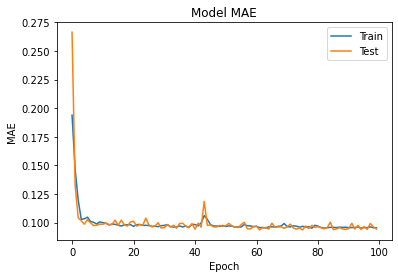

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

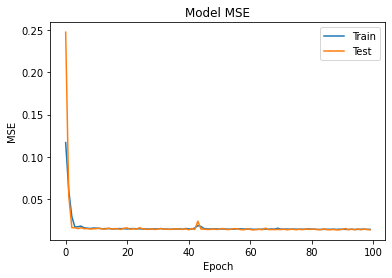

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

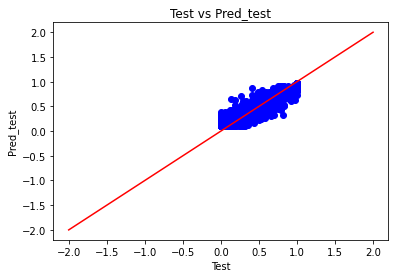

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

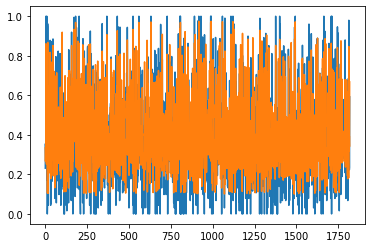

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

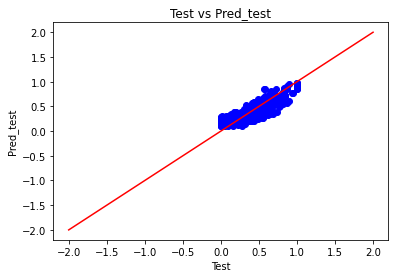

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

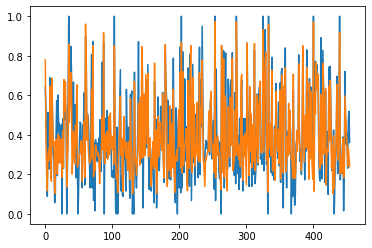

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.11936086409717714
0.11904151377237514


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9948937892913818, p = 6.912914159329375e-06
Test k = 0.995810329914093, p = 0.26821306347846985


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9971387386322021, p_s = 0.0003122141060885042
k_n = 20.550329809511418, p_n = 3.447883485128957e-05


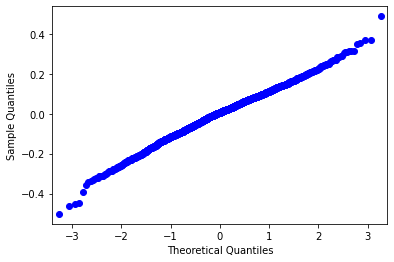

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

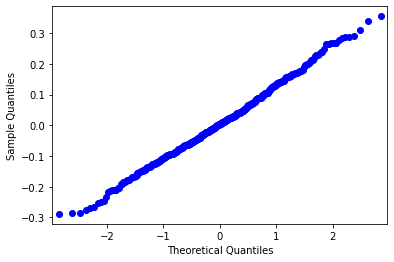

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

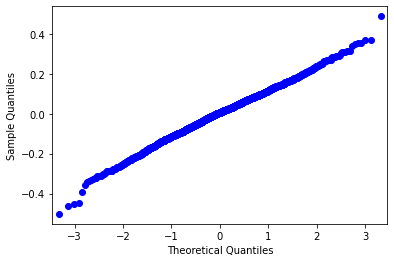

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

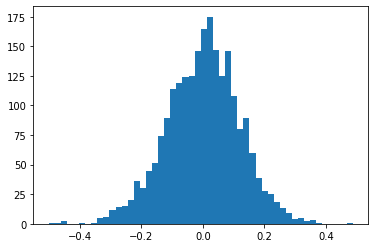

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')